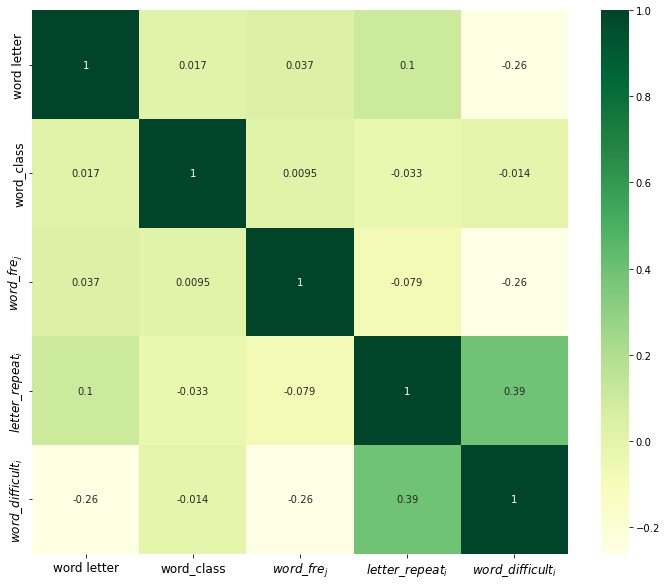

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path1 =  r"D:\MCM\pro1百分比残差与单词特征.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)
df = df.iloc[:,2:]
# df.drop('word_class',axis = 1,inplace = True)
plt.figure(figsize=(12,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(df.corr(method='spearman'),cmap = "YlGn", annot = True)
plt.show()

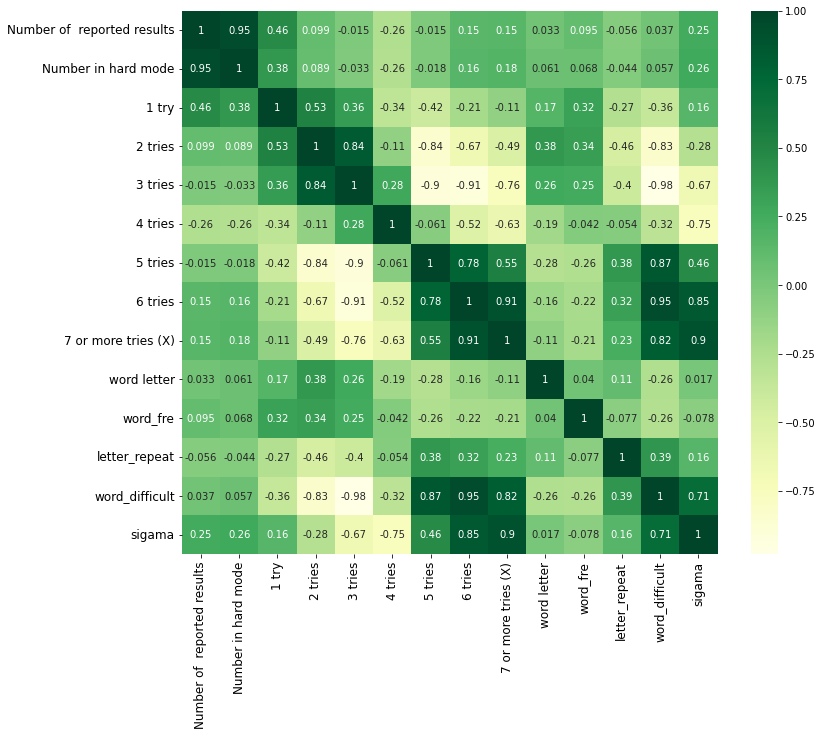

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path1 =  r"D:\MCM\data sigma.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)
df = df.iloc[:,5:]
df.drop('word_class',axis = 1,inplace = True)
plt.figure(figsize=(12,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(df.corr(method='spearman'),cmap = "YlGn", annot = True)
plt.show()

     word letter  word_class  word_fre  letter_repeat
0       0.241127           1         4              1
1       0.288451           1         3              1
2       0.318873           1         2              2
3       0.251268           3         3              1
4       0.235493           2         5              1
..           ...         ...       ...            ...
350     0.284507           1         3              2
351     0.294648           1         1              1
352     0.261408           1         3              1
353     0.341972           3         1              1
354     0.275493           4         1              1

[355 rows x 4 columns]
0      3.70
1      3.79
2      4.41
3      4.14
4      3.10
       ... 
350    4.14
351    3.76
352    4.11
353    3.75
354    4.03
Name: word_difficult, Length: 355, dtype: float64
均方误差： 0.24833099725594732
均方根误差： 0.49832820234855996
均方误差： 0.25518509976682907
均方根误差： 0.5051584897503248
均方误差： 0.26239217354348
均方根误差： 0.512242299

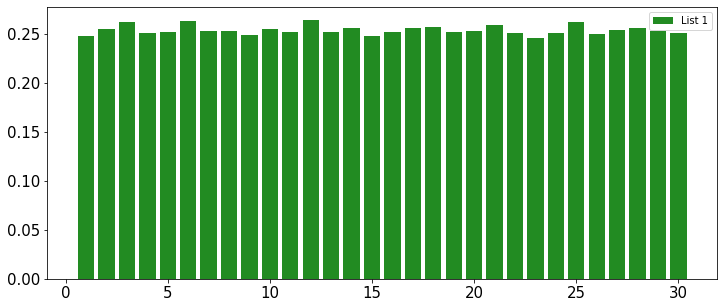

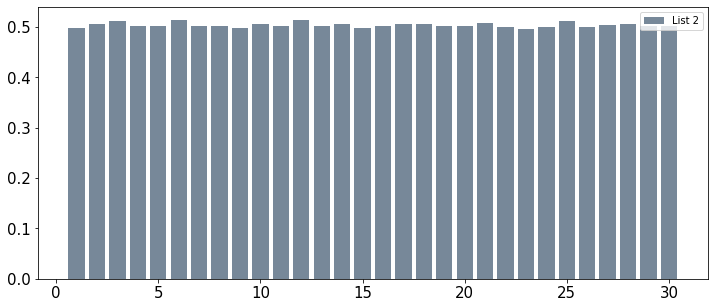

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import pylab as plt

path1 =  r"D:\MCM\333.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)
X = df.iloc[:,0:4]
print(X)
y = df.iloc[:,4]
print(y)
# 假设您已经准备好了您的数据集 X 和 y，其中 X 是 4 个特征值的特征矩阵，y 是难度评分的向量

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 对数据进行标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mselist = []
rmselist = []

for i in range(0,30):

    # 定义MLP回归模型
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', max_iter=1000, random_state=i)

    # 训练模型
    mlp.fit(X_train, y_train)

    # 在测试集上进行预测
    y_pred = mlp.predict(X_test)

    # 计算模型的性能指标（例如，均方误差、均方根误差等）
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mselist.append(mse)
    rmselist.append(rmse)

    print("均方误差：",mse)
    print("均方根误差：",rmse)

x = np.arange(1,31)

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(x, mselist, label='List 1',color = ['forestgreen'])
ax.legend()
# plt.title('MSE')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(x, rmselist, label='List 2',color = ['lightslategrey'])
ax.legend()
# plt.title('RMSE')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA
from scipy.stats import zscore

path = r"D:\MCM\data sigma.xlsx"
df = pd.read_excel(path)

df1 = df[(df['word_difficult']>=2) & (df['word_difficult']<3.5)]
df1 = df1.iloc[:,14:18]
df1 = df1.drop('word_class',axis = 1)
print(len(df1))
# df2 = df[df(df['word_difficult']>=3.5) & (df['word_difficult']<4)]

# df3 = df[df(df['word_difficult']>=4) & (df['word_difficult']<6)]

b=zscore(df1, ddof=1)   #数据标准化
md=PCA().fit(b)  #构造并拟合模型
print('特征值为：', md.explained_variance_)
print('各主成分贡献率：', md.explained_variance_ratio_)
xs1=md.components_  #提出各主成分系数，每行是一个主成分
print('各主成分系数:\n',xs1)
check=xs1.sum(axis=1,keepdims=True)  #计算各个主成分系数的和
xs2=xs1*np.sign(check)  #调整主成分系数，和为负时乘以-1
print('调整后的主成分系数：', xs2)

print("*******************************************************")

df1 = df[(df['word_difficult']>=3.5) & (df['word_difficult']<4)]
df1 = df1.iloc[:,14:18]
df1 = df1.drop('word_class',axis = 1)
print(len(df1))

b=zscore(df1, ddof=1)   #数据标准化
md=PCA().fit(b)  #构造并拟合模型
print('特征值为：', md.explained_variance_)
print('各主成分贡献率：', md.explained_variance_ratio_)
xs1=md.components_  #提出各主成分系数，每行是一个主成分
print('各主成分系数:\n',xs1)
check=xs1.sum(axis=1,keepdims=True)  #计算各个主成分系数的和
xs2=xs1*np.sign(check)  #调整主成分系数，和为负时乘以-1
print('调整后的主成分系数：', xs2)

print("*******************************************************")

df1 = df[(df['word_difficult']>=4) & (df['word_difficult']<6)]
df1 = df1.iloc[:,14:18]
df1 = df1.drop('word_class',axis = 1)
print(len(df1))

b=zscore(df1, ddof=1)   #数据标准化
md=PCA().fit(b)  #构造并拟合模型
print('特征值为：', md.explained_variance_)
print('各主成分贡献率：', md.explained_variance_ratio_)
xs1=md.components_  #提出各主成分系数，每行是一个主成分
print('各主成分系数:\n',xs1)
check=xs1.sum(axis=1,keepdims=True)  #计算各个主成分系数的和
xs2=xs1*np.sign(check)  #调整主成分系数，和为负时乘以-1
print('调整后的主成分系数：', xs2)

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import pylab as plt

path1 =  r"D:\MCM\333.xlsx"#path1是短期的文件路径
df= pd.read_excel(path1)
df = df[df['word_difficult']>4]
X = df.iloc[:,0:4]
print(X)
y = df.iloc[:,4]
print(y)
# 假设您已经准备好了您的数据集 X 和 y，其中 X 是 4 个特征值的特征矩阵，y 是难度评分的向量

# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 对数据进行标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

meslist = []
rmselist = []

# 定义MLP回归模型
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='logistic', solver='adam', max_iter=1000, random_state=42)

# 训练模型
mlp.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = mlp.predict(X_test)

# 计算模型的性能指标（例如，均方误差、均方根误差等）
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mselist.append(mse)
rmselist.append(rmse)

print("均方误差：",mse)
print("均方根误差：",rmse)


input_array = np.array([0.49577464788732395, 3,3,3])
input_array = input_array.reshape(1, -1)
yh = mlp.predict(input_array)
print(yh)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', max_iter=1000, random_state=42)

# 训练模型
mlp.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = mlp.predict(X_test)

# 计算模型的性能指标（例如，均方误差、均方根误差等）
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mselist.append(mse)
rmselist.append(rmse)

print("均方误差：",mse)
print("均方根误差：",rmse)

input_array = np.array([0.49577464788732395, 3,3,3])
input_array = input_array.reshape(1, -1)
yh = mlp.predict(input_array)
print(yh)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42)

# 训练模型
mlp.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = mlp.predict(X_test)

# 计算模型的性能指标（例如，均方误差、均方根误差等）
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mselist.append(mse)
rmselist.append(rmse)

print("均方误差：",mse)
print("均方根误差：",rmse)

input_array = np.array([0.49577464788732395, 3,3,3])
input_array = input_array.reshape(1, -1)
yh = mlp.predict(input_array)
print(yh)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='identity', solver='adam', max_iter=1000, random_state=42)

# 训练模型
mlp.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = mlp.predict(X_test)

# 计算模型的性能指标（例如，均方误差、均方根误差等）
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mselist.append(mse)
rmselist.append(rmse)

print("均方误差：",mse)
print("均方根误差：",rmse)

input_array = np.array([0.49577464788732395, 3,3,3])
input_array = input_array.reshape(1, -1)
yh = mlp.predict(input_array)
print(yh)

print(mselist)
print(rmselist)

     word letter  word_class  word_fre  letter_repeat
2       0.318873           1         2              2
3       0.251268           3         3              1
5       0.282254           1         5              1
6       0.274930           1         1              2
11      0.236056           1         3              1
..           ...         ...       ...            ...
345     0.318310           1         3              2
349     0.200563           1         5              1
350     0.284507           1         3              2
352     0.261408           1         3              1
354     0.275493           4         1              1

[112 rows x 4 columns]
2      4.41
3      4.14
5      4.30
6      4.33
11     4.68
       ... 
345    4.28
349    5.05
350    4.14
352    4.11
354    4.03
Name: word_difficult, Length: 112, dtype: float64
均方误差： 0.1366083134789143
均方根误差： 0.36960561884110243
[4.51652944]
均方误差： 0.2544150625554316
均方根误差： 0.5043957400250637
[4.80165749]
均方误差： 0.210365680